# Estimación del cultivo

## Métricas de las variables

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import json
import math

In [44]:
#df = pd.read_csv(r'score/zafras_modelado.csv')
df21_r = pd.read_csv(r'score/zafra21_r.csv')
df22_r = pd.read_csv(r'score/zafra22_r.csv')
df23_r = pd.read_csv(r'score/zafra23_r.csv')
df21_m = pd.read_csv(r'score/zafra21_m.csv')
df22_m = pd.read_csv(r'score/zafra22_m.csv')
df23_m = pd.read_csv(r'score/zafra23_m.csv')
df_r = pd.read_csv(r'score/zafras_r.csv')
df_m = pd.read_csv(r'score/zafras_m.csv')
df21122_2223_r = pd.read_csv(r'score/zafra2122_2223_r.csv')
df21122_2223_m = pd.read_csv(r'score/zafra2122_2223_m.csv')

In [57]:
df21_r['zafra'] = 2021
df21_m['zafra'] = 2021
df22_r['zafra'] = 2022
df22_m['zafra'] = 2022
df23_r['zafra'] = 2023
df23_m['zafra'] = 2023
df_r['tipo'] = 'Real'
df_m['tipo'] = 'Modelado'
df21122_2223_r['tipo'] = 'Real'
df21122_2223_m['tipo'] = 'Modelado'

### 21/22 y 22/23

In [60]:
concat_reales = pd.concat([df21_r, df22_r])
concat_modelados = pd.concat([df21_m, df22_m])
concated_total = pd.concat([df21122_2223_r, df21122_2223_m])

In [65]:
df21122_2223_m.sort_values(by='R2', ascending=False).round(decimals=3)

,Variable,R2,P_values,MSE,Params,RMSE,tipo
4,cire_max,0.613,[3.03150661e-01 1.64837983e-05],2444.538,[10.82399739 27.17313764],49.442,Modelado
8,ndre_max,0.598,[1.03941396e-01 2.43984379e-05],2384.557,[-30.90692776 191.68800955],48.832,Modelado
6,ndre1_max,0.570,[1.57190043e-01 4.87426642e-05],2273.241,[-27.17447987 214.84004942],47.679,Modelado
2,gndvi_max,0.554,[6.99090920e-03 7.10251754e-05],2209.642,[-102.88465694 272.74544449],47.007,Modelado
0,ndvi_max,0.540,[1.67581275e-02 9.74057698e-05],2154.575,[-79.08884991 198.12016446],46.417,Modelado
5,cire_mean,0.523,[3.55021194e-01 1.44514811e-04],2083.548,[11.50305705 38.76124981],45.646,Modelado
9,ndre_mean,0.482,[0.24283068 0.00033696],1922.400,[-26.28970431 240.98502359],43.845,Modelado
3,gndvi_mean,0.466,[0.02333029 0.00045987],1860.125,[-96.40358931 314.99779005],43.129,Modelado
7,ndre1_mean,0.429,[0.4768057 0.0009446],1709.401,[-15.65025815 258.88409396],41.345,Modelado
10,ndmi_mean,0.403,[1.40218378e-08 1.49801276e-03],1607.922,[ 49.51448701 160.37914055],40.099,Modelado


<Figure size 1000x1000 with 0 Axes>

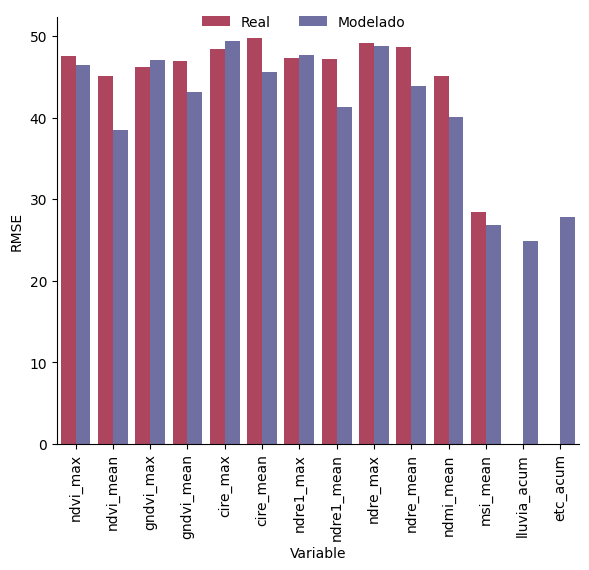

In [64]:
plt.figure(figsize=(10,10))
a = sns.catplot(data=concated_total, x='Variable', y='RMSE', kind='bar', hue='tipo', legend='auto', palette=sns.color_palette(['#BE3455', '#6667AB']))
sns.move_legend(a, loc='upper center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.xlabel('Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.savefig(r'../../tesis_img/yield_new/zafras2122_2223_rmse_r_vs_m.pdf', dpi=150)
plt.show()

## Modelo de regresion

In [16]:
rl21_r = pd.read_csv(r'predicts/zafra21_r.csv')
rl22_r = pd.read_csv(r'predicts//zafra22_r.csv')
rl23_r = pd.read_csv(r'predicts//zafra23_r.csv')
rl21_m = pd.read_csv(r'predicts//zafra21_m.csv')
rl22_m = pd.read_csv(r'predicts//zafra22_m.csv')
rl23_m = pd.read_csv(r'predicts//zafra23_m.csv')
rl_r = pd.read_csv(r'predicts//zafras_r.csv')
rl_m = pd.read_csv(r'predicts//zafras_m.csv')

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_13240\596472073.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


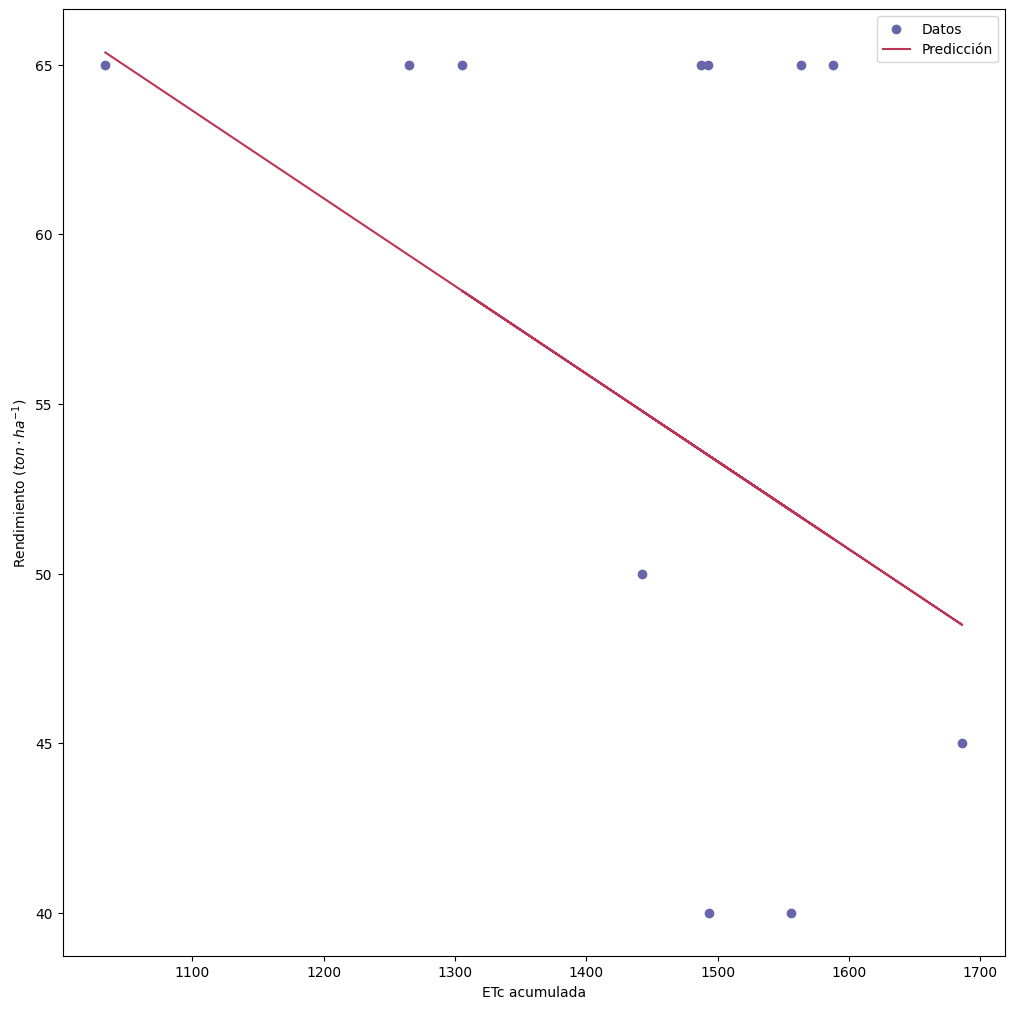

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(rl23_m['etc_acum'], rl23_m['rendimiento'], color='#6667AB', label='Datos')
plt.plot(rl23_m['etc_acum'], rl23_m['etc_acum_pred'], color='#BE3455', label='Predicción')
plt.tight_layout()
plt.legend()
plt.xlabel('ETc acumulada')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
plt.savefig(r'../../tesis_img/yield_new/etc_acum_23_m.pdf', dpi=150)
plt.show()

## Regresión lineal múltiple

In [72]:
root = Path(r'score_mlr/')

In [111]:
r2_files = []

for i in root.iterdir():
    for j in i.iterdir():
        for k in j.iterdir():
            for a in k.iterdir():
                with open(a, 'r') as f:
                    content = json.load(f)
                    if 'rsquared' in content:
                        r2 = content['rsquared']
                        aic = content['aic']
                        mse = content['mse_model']
                        rmse = content['rmse_model']
                        if isinstance(r2, float) and math.isnan(r2):
                            continue
                        r2_files.append((a, j.stem, k.stem, r2, aic, mse, rmse))

In [112]:
df_r2 = pd.DataFrame(r2_files, columns=['File', 'tipo', 'var_nums', 'R2', 'aic', 'mse', 'rmse'])

In [124]:
df_r2= df_r2.sort_values(by='var_nums', ascending=True)

In [128]:
df_r2

,File,tipo,var_nums,R2,aic,mse,rmse
330,score_mlr\zafra21_m\mean\2\comb_20.json,mean,2,0.692558,71.710641,470.939241,21.701135
763,score_mlr\zafra22_r\mean\2\comb_16.json,mean,2,0.654889,91.196463,807.696016,28.419993
1065,score_mlr\zafra23_r\mean\2\comb_6.json,mean,2,0.653865,58.613888,317.737566,17.825195
626,score_mlr\zafra22_m\mean\2\comb_5.json,mean,2,0.653865,91.232006,806.433416,28.397771
325,score_mlr\zafra21_m\mean\2\comb_16.json,mean,2,0.651892,72.952902,443.286379,21.054367
...,...,...,...,...,...,...,...
145,score_mlr\zafra2122_2223_m\mean\7\comb_1.json,mean,7,0.697155,166.550824,397.129530,19.928109
729,score_mlr\zafra22_m\mean\7\comb_1.json,mean,7,0.860959,90.287290,303.385528,17.417966
875,score_mlr\zafra22_r\mean\7\comb_1.json,mean,7,0.910487,85.002646,320.838325,17.911960
1313,score_mlr\zafras_m\mean\7\comb_1.json,mean,7,0.301221,251.783130,224.666321,14.988873


Comparar el desempeño por cantidad de variables puede ser una buena idea

In [129]:
test = df_r2[df_r2['var_nums'] == '2']

In [132]:
test.sort_values(by='R2', ascending=False)

,File,tipo,var_nums,R2,aic,mse,rmse
301,score_mlr\zafra21_m\max\2\comb_9.json,max,2,0.957883,51.832328,651.360306,25.521761
294,score_mlr\zafra21_m\max\2\comb_2.json,max,2,0.953504,52.821437,648.382695,25.463360
297,score_mlr\zafra21_m\max\2\comb_5.json,max,2,0.933224,56.441232,634.592193,25.191113
296,score_mlr\zafra21_m\max\2\comb_4.json,max,2,0.927593,57.250812,630.763164,25.114999
300,score_mlr\zafra21_m\max\2\comb_8.json,max,2,0.915934,58.743740,622.835396,24.956670
...,...,...,...,...,...,...,...
883,score_mlr\zafra23_m\max\2\comb_7.json,max,2,0.036582,66.803158,17.776598,4.216230
1066,score_mlr\zafra23_r\mean\2\comb_7.json,mean,2,0.029651,66.860510,14.408306,3.795827
920,score_mlr\zafra23_m\mean\2\comb_7.json,mean,2,0.028412,66.870712,13.806615,3.715725
922,score_mlr\zafra23_m\mean\2\comb_9.json,mean,2,0.022551,66.918827,10.958492,3.310361


In [115]:
df_r2.to_csv(r'mlr_score_metrics.csv', index=False)

In [106]:
test = df_r2[df_r2['File'].str.contains('mean', case=False, na=False)]